In [4]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

In [5]:
device=torch.device('cpu')

In [48]:
# Step 1. Prepare data-1/2
# DataLoader wraps a Dataset and provides minibatches, shuffling, multithreading, for you
data_in=np.loadtxt('./data/Re_100/input_u_fake.dat')
data_out=np.loadtxt('./data/Re_100/output_p.dat')
x=torch.Tensor(data_in)
y=torch.Tensor(data_out)
loader=DataLoader(TensorDataset(x, y), batch_size=204)

In [7]:
# Step 2. Create model 建立model習慣建立class
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, B, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear_1=torch.nn.Linear(D_in, H)
        self.linear_2=torch.nn.Linear(H, B)
        self.linear_3=torch.nn.Linear(B, D_out)
    
    # Step 3. Forward pass-1/2    # Step 4. Backward pass-1/2
    def forward(self, x):
        h=self.linear_1(x)
        h_relu=torch.nn.functional.relu(h) #為何activation and hidden layer 的實現方式不同
        b=self.linear_2(h_relu) 
        b_relu=torch.nn.functional.relu(b)
        y_pred=self.linear_3(b_relu) 
        return y_pred
    
model= TwoLayerNet(D_in=6724, H=1000, B=100, D_out=6724)
model=model.to(device) #這行是什麼意思? A:将模型加载到相应的设备

In [8]:
PATH="01_model.pth"
model= TwoLayerNet(D_in=6724, H=1000, B=100, D_out=6724)
model.load_state_dict(torch.load(PATH))
model.eval()

TwoLayerNet(
  (linear_1): Linear(in_features=6724, out_features=1000, bias=True)
  (linear_2): Linear(in_features=1000, out_features=100, bias=True)
  (linear_3): Linear(in_features=100, out_features=6724, bias=True)
)

In [84]:
import matplotlib.pyplot as plt
num=5
skip=50

0


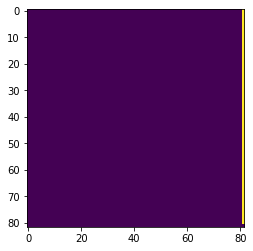

50


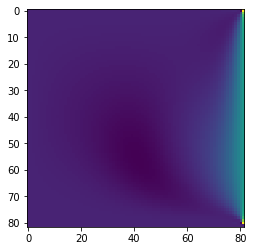

100


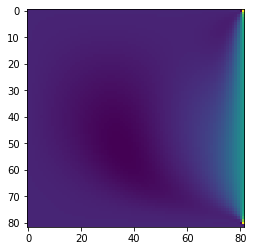

150


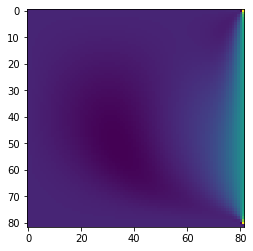

200


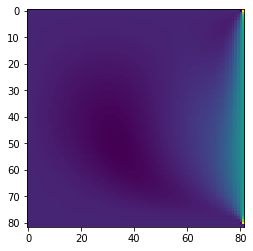

In [85]:
# input
for idx in range(num):
    i=idx*skip
    print(i)
    x_test=x[i]
    H = np.reshape(x_test, (82, 82))
    H = np.array(H)
    plt.imshow(H, interpolation='none')
    plt.show()

0


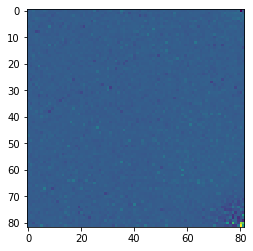

50


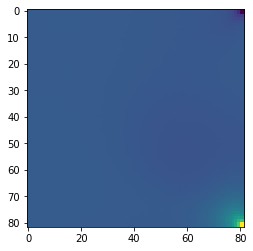

100


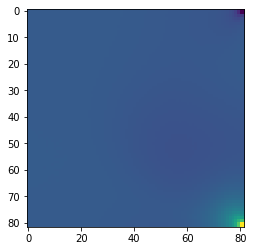

150


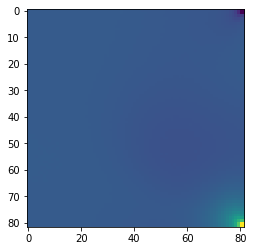

200


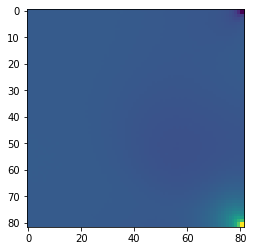

In [86]:
# ML output
for idx in range(num):
    i=idx*skip
    print(i)
    x_test=x[i]
    y_test=model(x_test)
    y_test=y_test.detach()
    H = np.reshape(y_test, (82, 82))
    H = np.array(H)
    plt.imshow(H, interpolation='none')
    plt.show()

0


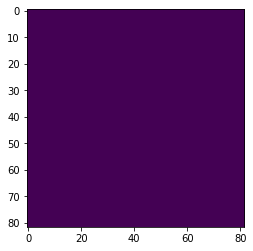

50


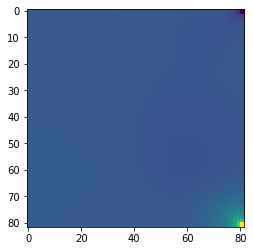

100


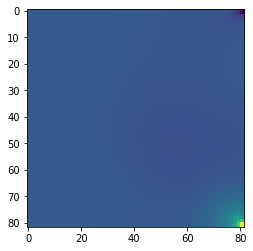

150


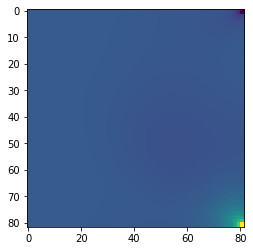

200


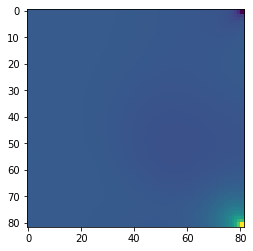

<Figure size 432x288 with 0 Axes>

In [87]:
# Benchmark
for idx in range(num):
    i=idx*skip
    print(i)
    y_gs=y[i]
    H = np.reshape(y_gs, (82, 82))
    H = np.array(H)
    plt.imshow(H, interpolation='none')
    plt.show()
    plt.tight_layout()

0


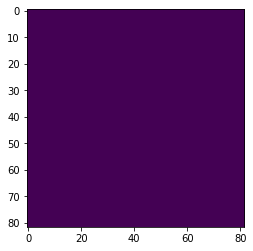

50


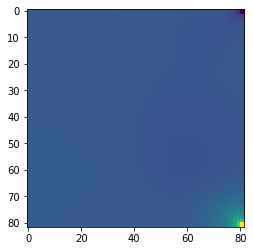

100


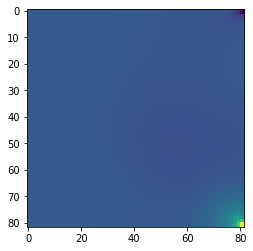

150


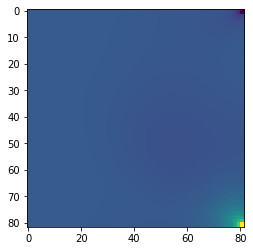

200


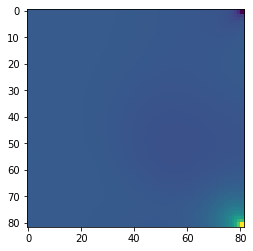

In [88]:
for idx in range(num):
    i=idx*skip
    print(i)
    y_gs=y[i]
    H = np.reshape(y_gs, (82, 82))
    H = np.array(H)
    plt.imshow(H, interpolation='none')
    plt.show()

0


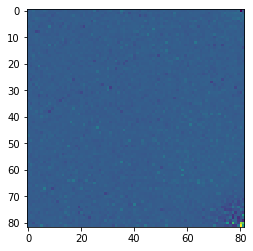

50


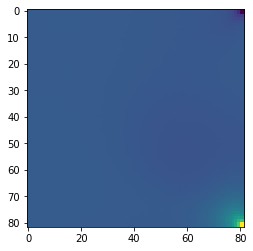

100


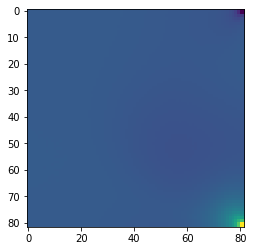

150


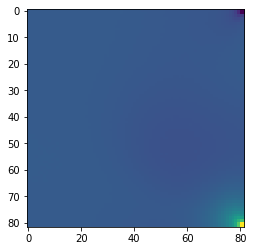

200


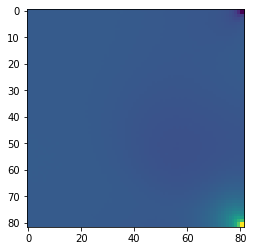

In [86]:
# ML output
for idx in range(num):
    i=idx*skip
    print(i)
    x_test=x[i]
    y_test=model(x_test)
    y_test=y_test.detach()
    H = np.reshape(y_test, (82, 82))
    H = np.array(H)
    plt.imshow(H, interpolation='none')
    plt.show()